# DATAFRAME TÉCNICO - EDA

In [1]:
import re
import os
import xml.etree.ElementTree as ET
import mysql.connector 
import pandas as pd
import numpy as np
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns

### Creamos un dataframe dónde incluimos sólo a las mujeres que trabajan actualmente como ingenieras de Machine Learning.

In [2]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1',
                              database='proyecto_1_equipo_1')
mycursor = cnx.cursor()
mycursor.execute("""SELECT xml.age, txt.q3, txt.q4, txt.q20, txt.q6, txt.q15, txt.q7
                    FROM data_txt AS txt
                    INNER JOIN data_xml AS xml
                    ON txt.index_sql = xml.index_sql 
                    WHERE xml.gender = "Woman" AND txt.q5 = "Machine Learning Engineer" """)

myresult = mycursor.fetchall()
df_tecnico = pd.DataFrame(myresult, columns = ["edad","pais", "nivel de estudios", "sector", "años de experiencia", "años de experiencia en ML", "lenguaje mas usado"])
cnx.close()

### Realizamos una esploración exhaustiva de nuestro DataFrame.

In [3]:
df_tecnico.head()

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,lenguaje mas usado
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,"Python, C++"
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Python
2,22-24,Morocco,Master’s degree,Computers/Technology,1-3 years,Under 1 year,"Python, SQL, MATLAB, Other"
3,18-21,Bangladesh,Bachelor’s degree,Non-profit/Service,under 1 years,Under 1 year,Python
4,18-21,India,Bachelor’s degree,Academics/Education,1-3 years,Under 1 year,"Python, SQL, C, C++"


In [4]:
df_tecnico.tail()

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,lenguaje mas usado
174,25-29,Egypt,Master’s degree,Academics/Education,5-10 years,I do not use machine learning methods,"Python, C, Java, Javascript, MATLAB"
175,18-21,Other,Bachelor’s degree,Academics/Education,1-3 years,Under 1 year,"Python, R, C, C++"
176,25-29,Thailand,Bachelor’s degree,Manufacturing/Fabrication,1-3 years,I do not use machine learning methods,"NULL, C, MATLAB"
177,18-21,India,Bachelor’s degree,Academics/Education,under 1 years,Under 1 year,"Python, C, Java"
178,25-29,Pakistan,Master’s degree,Online Service/Internet-based Services,1-3 years,2-3 years,"Python, C++, Bash"


In [5]:
df_tecnico.shape

(179, 7)

In [6]:
df_tecnico.describe(include = "all").T

,count,unique,top,freq
edad,179,9,25-29,48
pais,179,40,India,56
nivel de estudios,179,7,Master’s degree,82
sector,179,18,Computers/Technology,51
años de experiencia,179,7,1-3 years,61
años de experiencia en ML,179,9,Under 1 year,51
lenguaje mas usado,179,58,Python,47


In [7]:
df_tecnico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       179 non-null    object
 1   pais                       179 non-null    object
 2   nivel de estudios          179 non-null    object
 3   sector                     179 non-null    object
 4   años de experiencia        179 non-null    object
 5   años de experiencia en ML  179 non-null    object
 6   lenguaje mas usado         179 non-null    object
dtypes: object(7)
memory usage: 9.9+ KB


In [8]:
df_tecnico.stb.freq(['edad'])

,edad,count,percent,cumulative_count,cumulative_percent
0,25-29,48,26.815642,48,26.815642
1,22-24,44,24.581006,92,51.396648
2,18-21,35,19.553073,127,70.949721
3,30-34,26,14.525140,153,85.474860
4,35-39,14,7.821229,167,93.296089
5,40-44,8,4.469274,175,97.765363
6,50-54,2,1.117318,177,98.882682
7,55-59,1,0.558659,178,99.441341
8,45-49,1,0.558659,179,100.000000


In [9]:
df_tecnico.stb.freq(['años de experiencia'])

,años de experiencia,count,percent,cumulative_count,cumulative_percent
0,1-3 years,61,34.078212,61,34.078212
1,3-5 years,37,20.670391,98,54.748603
2,under 1 years,35,19.553073,133,74.301676
3,5-10 years,24,13.407821,157,87.709497
4,I have never written code,10,5.586592,167,93.296089
5,10-20 years,7,3.910615,174,97.206704
6,20+ years,5,2.793296,179,100.000000


In [10]:
df_tecnico.stb.freq(['años de experiencia en ML'])

,años de experiencia en ML,count,percent,cumulative_count,cumulative_percent
0,Under 1 year,51,28.491620,51,28.491620
1,1-2 years,45,25.139665,96,53.631285
2,2-3 years,21,11.731844,117,65.363128
3,,19,10.614525,136,75.977654
4,3-4 years,11,6.145251,147,82.122905
5,I do not use machine learning methods,9,5.027933,156,87.150838
6,4-5 years,9,5.027933,165,92.178771
7,5-10 years,7,3.910615,172,96.089385
8,10-20 years,7,3.910615,179,100.000000


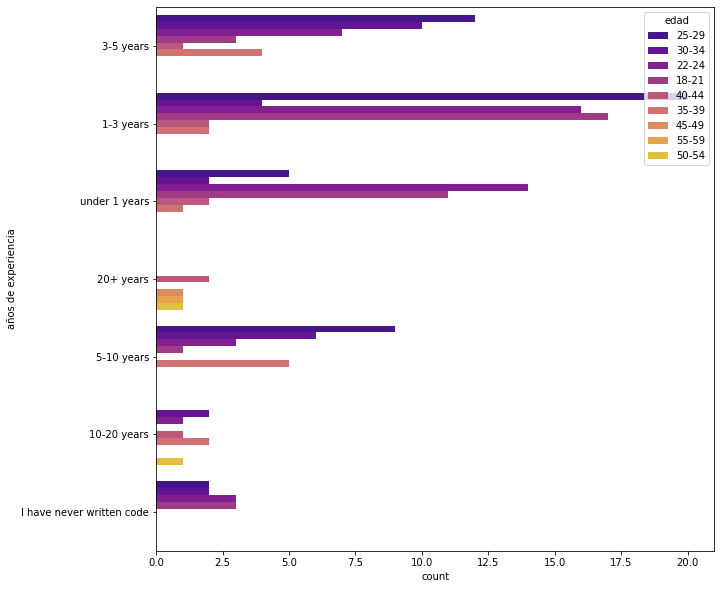

In [11]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_tecnico["años de experiencia"], hue = df_tecnico["edad"], palette = 'plasma')

plt.show()

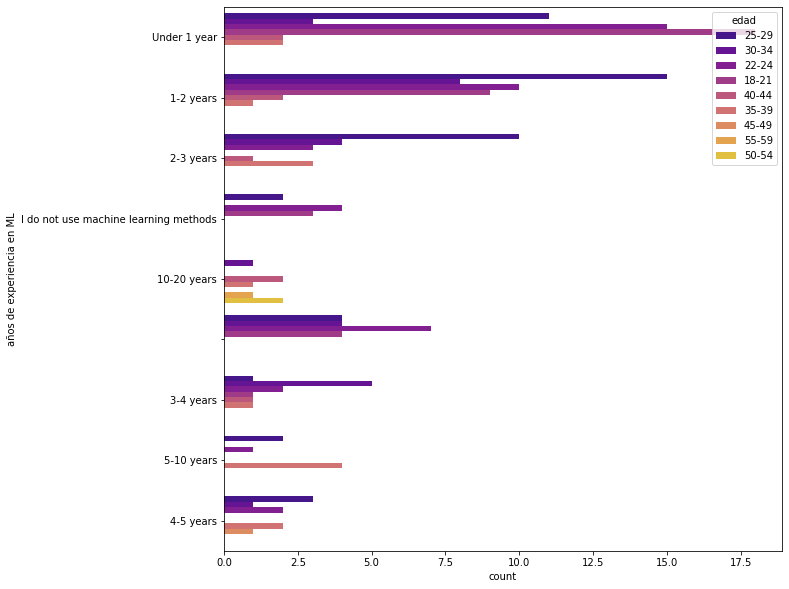

In [12]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_tecnico["años de experiencia en ML"], hue = df_tecnico["edad"], palette = 'plasma')

plt.show()

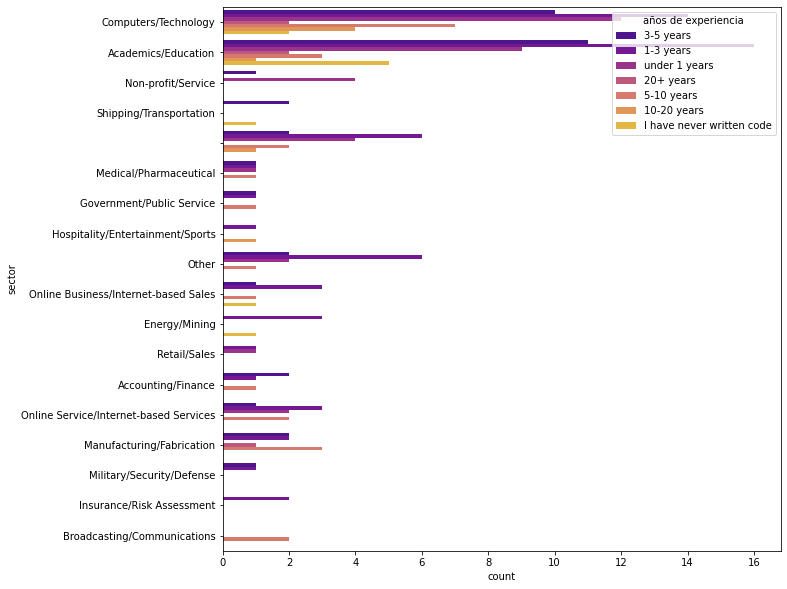

In [13]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_tecnico["sector"], hue = df_tecnico["años de experiencia"], palette = 'plasma')

plt.show()

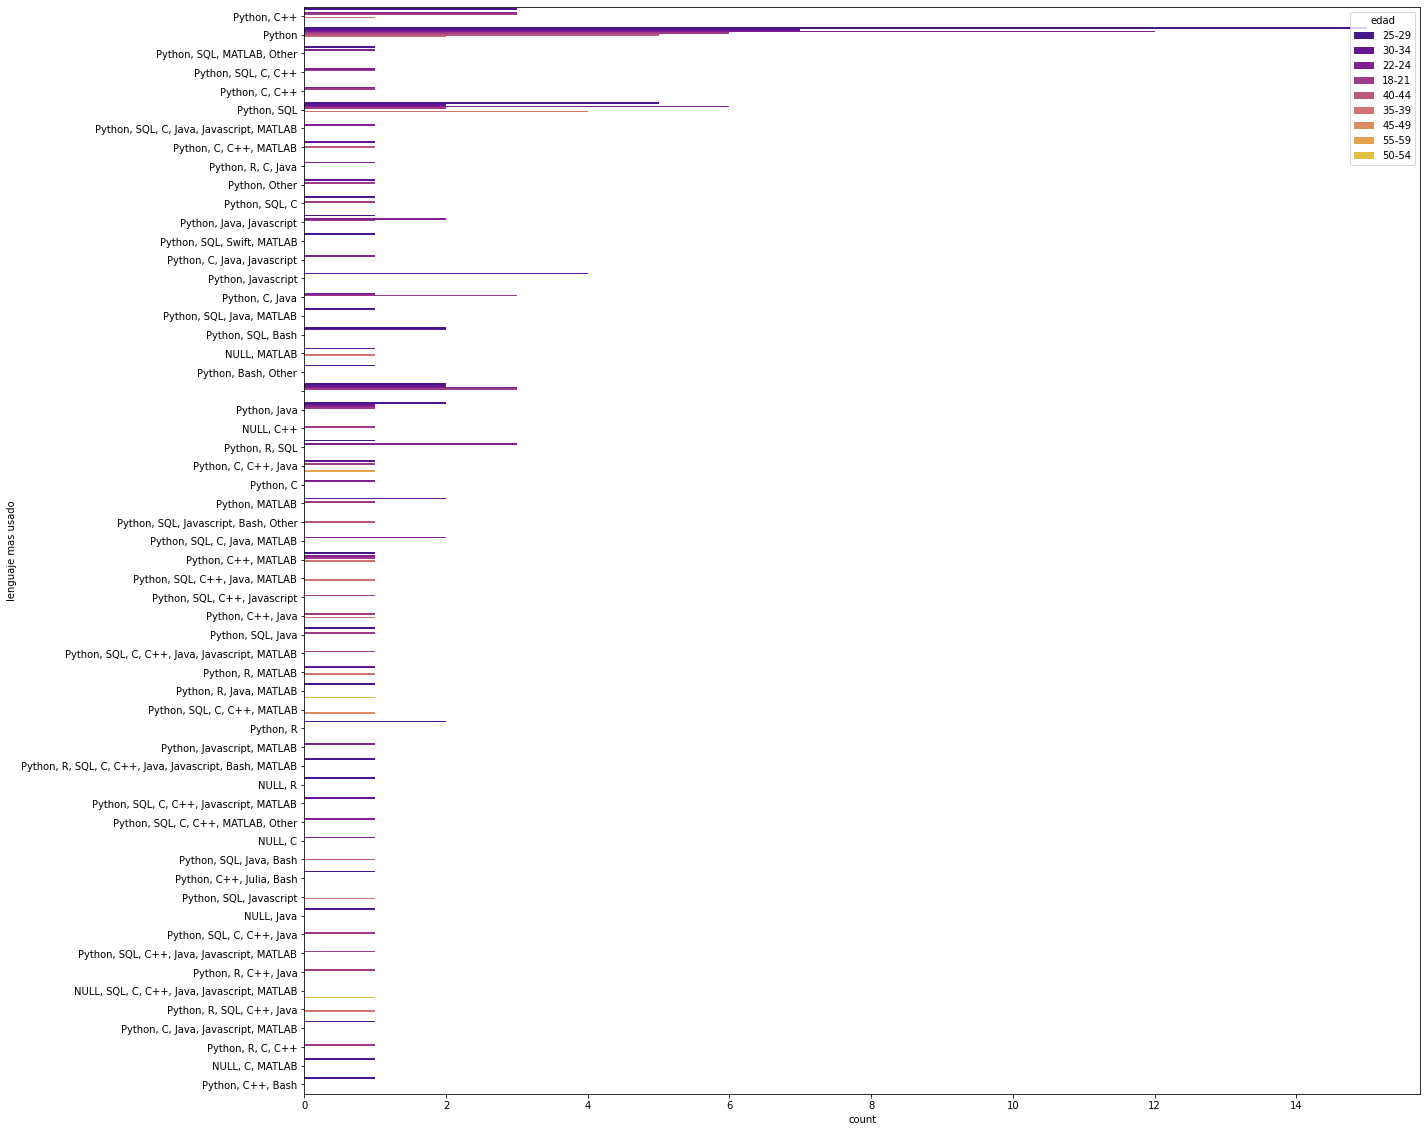

In [14]:
plt.figure(figsize=(20,20))

fig = sns.countplot(y = df_tecnico["lenguaje mas usado"], hue = df_tecnico["edad"], palette = 'plasma')

plt.show()

In [15]:
df_tecnico.to_csv('../Datos/df-tecnico-sucio.csv')